# **<font face="Comic Sans MS" color="darkblue">PREDICTING BUILDING DAMAGE SEVERITY FROM EARTHQUAKES: A CLASSIFICATION APPROACH</font>**

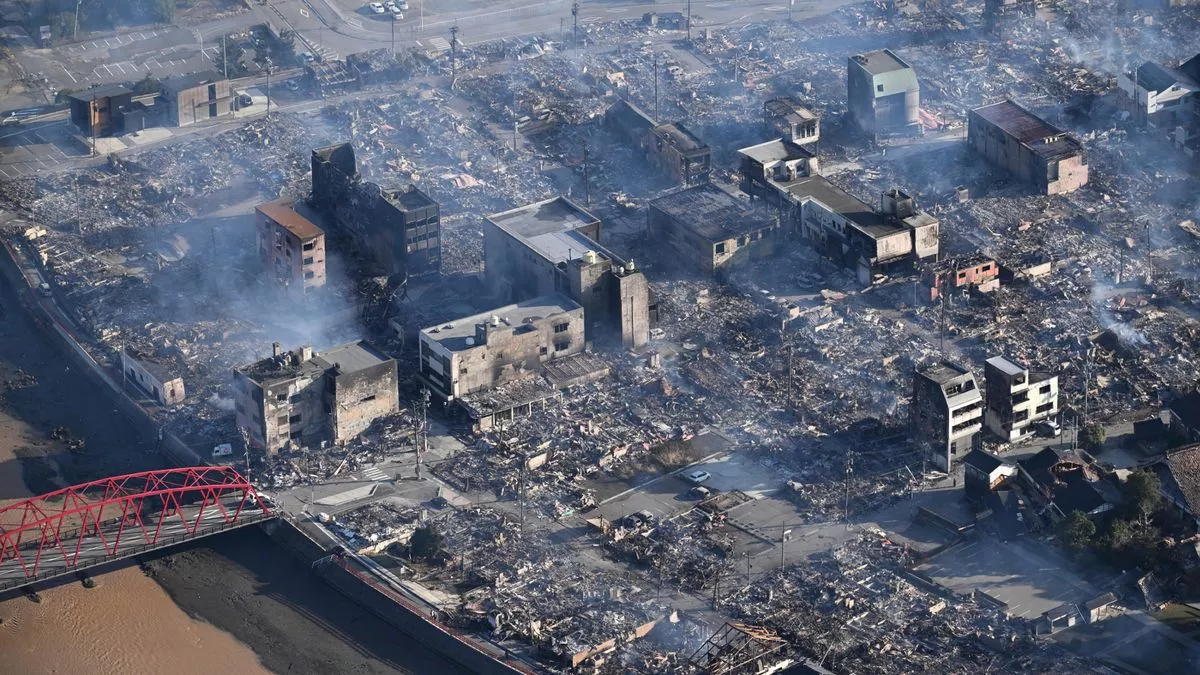

## **DATA OVERVIEW**

---



The dataset provided appears to contain detailed information about the structural characteristics and post-earthquake conditions of buildings.This dataset is essential for analyzing the impact of earthquakes on building structures and understanding the factors that contribute to building damage and necessary repairs.

The dataset consists of 762,106 entries and 31 columns.Each row in the dataset represents a specific building in the region that was hit by earthquake.The target variable has 5 classes, labelled 'Grade 1':'Grade 5' which each represent the different scale of damage sustained to the building. The attributes included in the dataset are as follows:




1.   **`building_id`** : Unique identifier for each building.
2.   **`district_id`** : Identifier for the district where the building is located
3.   **`vdcmun_id`** : Identifier for the Village Development Committee or Municipality.
4.  **`ward_id`**: Identifier for the ward within the municipality or VDC.
5.  **`count_floors_pre_eq`** : Number of floors the building had before the earthquake.
6.  **`count_floors_post_eq`** : Number of floors the building had after the earthquake.
7.  **`age_building`** : Age of the building in years.
8.  **`plinth_area_sq_ft`** : Plinth area of the building in square feet.
9.  **`height_ft_pre_eq`** : Height of the building before the earthquake in feet.
10.  **`height_ft_post_eq`** : Height of the building after the earthquake in feet.
11.  **`land_surface_condition`** : Condition of the land surface where the building is situated.

12. **`foundation_type`** : Type of foundation of the building.
13.  **`roof_type`** : Type of roof of the building.
14. **`ground_floor_type`** : Type of the ground floor of the building.
15. **`other_floor_type`** : Type of other floors (excluding ground floor) in the building.
16. **`position`** : Position of the building.
17. **`plan_configuration`** : Plan configuration of the building.
18. **`has_superstructure_adobe_mud`** : flag variable that indicates if the superstructure was made of Adobe/Mud(type: binary)
19. **`has_superstructure_mud_mortar_stone`** : Indicates if the building has a superstructure made of mud mortar stone (1: Yes, 0: No).
20. **`has_superstructure_stone_flag`** : Indicates if the building has a superstructure made of stone flags (1: Yes, 0: No).
21. **`has_superstructure_cement_mortar_stone`** : Indicates if the building has a superstructure made of cement mortar stone (1: Yes, 0: No).
22. **`has_superstructure_mud_mortar_brick`** : Indicates if the building has a superstructure made of mud mortar brick (1: Yes, 0: No).
23. **`has_superstructure_cement_mortar_brick`** : Indicates if the building has a superstructure made of cement mortar brick (1: Yes, 0: No).
24. **`has_superstructure_timber`** : Indicates if the building has a superstructure made of timber (1: Yes, 0: No).
25. **`has_superstructure_bamboo`** : Indicates if the building has a superstructure made of bamboo (1: Yes, 0: No).
26. **`has_superstructure_rc_non_engineered`** : Indicates if the building has a non-engineered reinforced concrete superstructure (1: Yes, 0: No).
27. **`has_superstructure_rc_engineered`** : Indicates if the building has an engineered reinforced concrete superstructure (1: Yes, 0: No).
28. **`has_superstructure_other`** : Indicates if the building has any other type of superstructure (1: Yes, 0: No).
29. **`condition_post_eq`** : Condition of the building post-earthquake.
30. **`damage_grade`** : Grade of damage sustained by the building.
31. **`technical_solution_proposed`** : Proposed technical solution for the building post-earthquake.












## **OBJECTIVE**

---



The primary goal of this analysis is to create a reliable classification model that accurately predict damage grade of buildings by earthquake. By utilizing the structural and geographic features in the dataset, the objective is to train a machine learning model that can effectively differentiate between various grades of damage.





# **Steps Involved in the Project**

1. Project Initiation and Planning
2. Data Collection
3. Data Preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Model Selection
7. Model Training
8. Model Evaluation
9. Model Deployment






##**IMPORTING LIBRARIES**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle
from sklearn.metrics import ConfusionMatrixDisplay
import warnings


## **IMPORTING DATASET**

---

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/csv_building_structure.csv')
df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366709001241,36,3603,360302,2,0,60,165,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


In [ ]:
#view 5 rows from data from header
df.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [ ]:
#view 5 rows from data from tail
df.tail()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
762101,366709001241,36,3603,360302,2,0,60,165,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762102,366709001251,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762103,366709001261,36,3603,360302,2,0,35,342,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762104,366709001271,36,3603,360302,2,0,19,306,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction
762105,366709001281,36,3603,360302,2,0,12,840,18,0,...,0,0,0,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction


In [ ]:
# the dimension of the data set
print(f'The Dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The Dataframe has 762106 rows and 31 columns


In [ ]:
#check data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             762106 non-null  int64 
 1   district_id                             762106 non-null  int64 
 2   vdcmun_id                               762106 non-null  int64 
 3   ward_id                                 762106 non-null  int64 
 4   count_floors_pre_eq                     762106 non-null  int64 
 5   count_floors_post_eq                    762106 non-null  int64 
 6   age_building                            762106 non-null  int64 
 7   plinth_area_sq_ft                       762106 non-null  int64 
 8   height_ft_pre_eq                        762106 non-null  int64 
 9   height_ft_post_eq                       762106 non-null  int64 
 10  land_surface_condition                  762106 non-null 


##**Descriptive Statistics**

---

Descriptive statistics summarize and organize characteristics of a data set.It uses quantitative tools like mean, variance, range, etc., to describe the features of data


In [ ]:
# Descriptive statistics for numerical features
df.describe().T.style.background_gradient(cmap = 'inferno')

,count,mean,std,min,25%,50%,75%,max
building_id,762106.000000,260751409208.772858,58018546481.397606,120101000011.000000,221909000243.500000,246302000176.000000,303608001088.500000,366709001281.000000
district_id,762106.000000,25.767835,5.807555,12.000000,22.000000,24.000000,30.000000,36.000000
vdcmun_id,762106.000000,2582.688357,581.172767,1201.000000,2204.000000,2410.000000,3010.000000,3611.000000
ward_id,762106.000000,258274.277335,58117.348412,120101.000000,220402.000000,241004.000000,301006.000000,361108.000000
count_floors_pre_eq,762106.000000,2.087783,0.655101,1.000000,2.000000,2.000000,2.000000,9.000000
count_floors_post_eq,762106.000000,1.252058,1.063275,0.000000,0.000000,1.000000,2.000000,9.000000
age_building,762106.000000,24.326405,65.043704,0.000000,9.000000,16.000000,27.000000,999.000000
plinth_area_sq_ft,762106.000000,406.672576,226.779371,70.000000,280.000000,358.000000,470.000000,5000.000000
height_ft_pre_eq,762106.000000,16.049372,5.493878,6.000000,12.000000,16.000000,18.000000,99.000000
height_ft_post_eq,762106.000000,9.868817,8.574169,0.000000,0.000000,11.000000,16.000000,99.000000


In [ ]:
# Descriptive statistics for Categorical features
df.describe(include=['O']).T

,count,unique,top,freq
land_surface_condition,762106,3,Flat,631675
foundation_type,762106,5,Mud mortar-Stone/Brick,628716
roof_type,762106,3,Bamboo/Timber-Light roof,503748
ground_floor_type,762106,5,Mud,618217
other_floor_type,762106,4,TImber/Bamboo-Mud,486907
position,762105,4,Not attached,604453
plan_configuration,762105,10,Rectangular,731257
condition_post_eq,762106,8,Damaged-Not used,207968
damage_grade,762094,5,Grade 5,275766
technical_solution_proposed,762094,4,Reconstruction,470219


In [ ]:
# checking value counts for each object type columns
for i in df.columns:
  if df[i].dtype=='object':
    print(df[i].value_counts(),'\n')
    print('='*50)

land_surface_condition
Flat              631675
Moderate slope    105640
Steep slope        24791
Name: count, dtype: int64 

foundation_type
Mud mortar-Stone/Brick    628716
Bamboo/Timber              57473
Cement-Stone/Brick         39245
RC                         32120
Other                       4552
Name: count, dtype: int64 

roof_type
Bamboo/Timber-Light roof    503748
Bamboo/Timber-Heavy roof    213774
RCC/RB/RBC                   44584
Name: count, dtype: int64 

ground_floor_type
Mud            618217
RC              73149
Brick/Stone     66093
Timber           3594
Other            1053
Name: count, dtype: int64 

other_floor_type
TImber/Bamboo-Mud    486907
Timber-Planck        123635
Not applicable       118822
RCC/RB/RBC            32742
Name: count, dtype: int64 

position
Not attached       604453
Attached-1 side    129432
Attached-2 side     26910
Attached-3 side      1310
Name: count, dtype: int64 

plan_configuration
Rectangular                        731257
Square 

# **DATA PREPROCESSING**

---



## **Detecting missing values**

In [ ]:
df.isna().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [ ]:
# Removing missing values
df.dropna(inplace=True)

In [ ]:
# Detecting duplicate rows
df.duplicated().sum()

0

In [ ]:
# Dropping irrelevant columns that has no contribution for prediction
df.drop(columns=['building_id','district_id','vdcmun_id','ward_id'],inplace=True)

In [ ]:
#droping technical advise column, no predictive power!
df=df.drop("technical_solution_proposed",axis=1)

In [ ]:
# Analyzing target variable
df['damage_grade'].value_counts()

damage_grade
Grade 5    275766
Grade 4    183844
Grade 3    136412
Grade 2     87257
Grade 1     78815
Name: count, dtype: int64

# **EXPLORATORY DATA ANALYSIS**

## **Univariate Analysis**

---



Statistical analysis that focuses on examining and summarizing the characteristics of a single variable.Provide a summary of each feature to understand its central tendency, dispersion, and distribution.

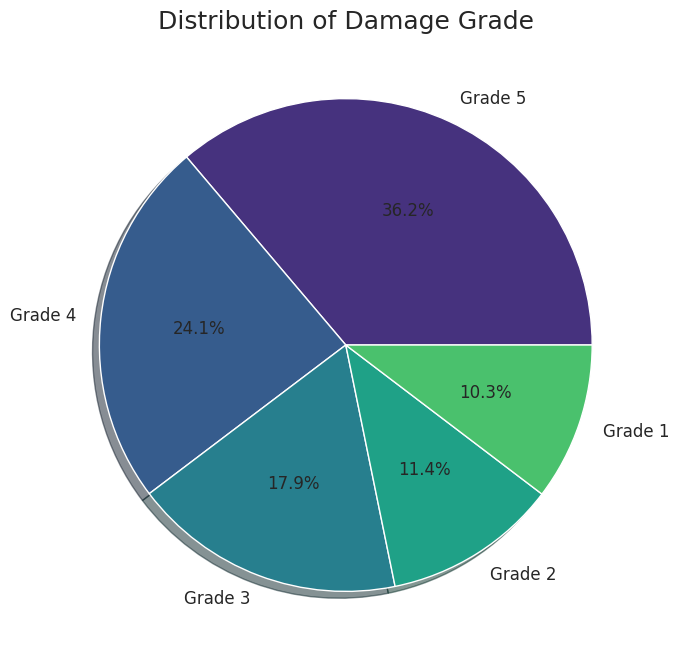

In [ ]:
# Plot Distribution of damage grade
sns.set_style('darkgrid')
labels = df['damage_grade'].value_counts().index.to_list()
counts = df['damage_grade'].value_counts().to_list()
colors = sns.color_palette('viridis')
plt.figure(figsize=(9,8))
plt.pie(counts, labels=labels, colors=colors, autopct='%.1f%%',shadow=True,textprops ={"fontsize": 12})
plt.title('Distribution of Damage Grade', fontsize=18)
plt.show()

To start we look at the distribution of the target variable,The pie chart depicts the proportion of different grades within the dataset.
* Each segment of the chart represents the percentage of the total dataset that
falls into each grade category.The grades range from Grade 1 to Grade 5, with **Grade 5** indicating **severe damage**.
* The chart indicates a noticeable imbalance in the grade distribution, with Grade 5 having a much higher percentage compared to the other grades, especially Grade 1 and Grade 2.

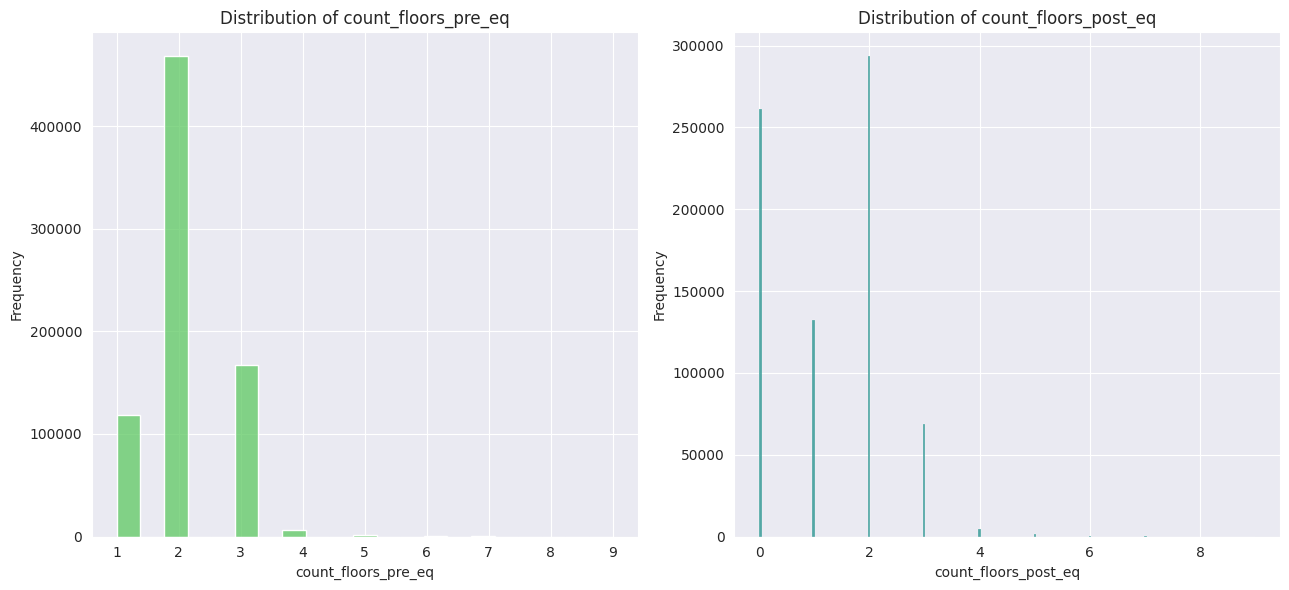

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
# Plot distribution of 'count_floors_pre_eq'
sns.histplot(data=df, x="count_floors_pre_eq", ax=axes[0],color=plt.cm.viridis(0.75))
axes[0].set_title('Distribution of count_floors_pre_eq')
axes[0].set_xlabel('count_floors_pre_eq')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'count_floors_post_eq'
sns.histplot(data=df, x="count_floors_post_eq", ax=axes[1],color=plt.cm.viridis(0.5))
axes[1].set_title('Distribution of count_floors_post_eq')
axes[1].set_xlabel('count_floors_post_eq')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

**Distribution of count_floors_pre_eq and count_floors_post_eq:**
   - Both distributions show a higher frequency of buildings with lower floor counts.
   - The post-earthquake distribution has a slightly higher proportion of buildings with zero floors, indicating that some structures may have collapsed entirely.

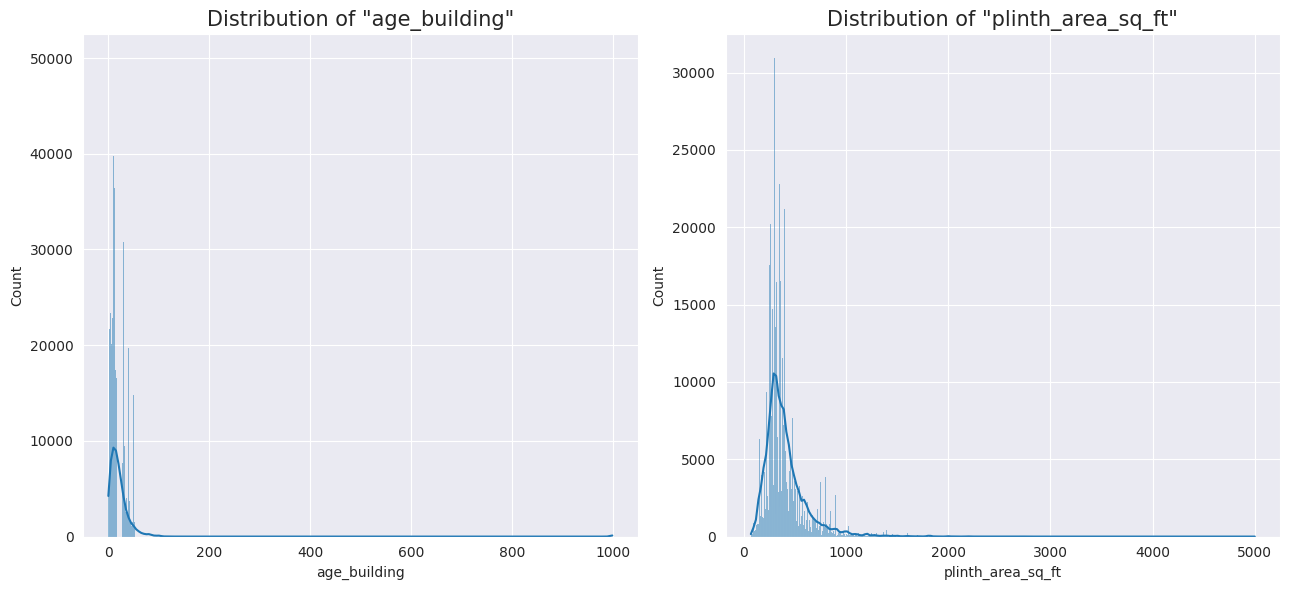

In [ ]:
cols=['age_building','plinth_area_sq_ft']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

# Plot each column in a subplot
for ax, col in zip(axes, cols):
    sns.histplot(data=df, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of "{col}"', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()


**Distribution of age_building and plinth_area_sq_ft:**
  - Age_building distribution suggests a mix of old and new buildings, with a higher frequency in the 0-20 year range.
  - Plinth_area_sq_ft shows a spread across various sizes, with a peak at lower values.

## **Multivariate Analysis**

---

Statistical technique used to examine and interpret data that involves more than one variable at a time. Identify and understand the relationships between multiple variables.

 **Distribution of categorical variables by damage grade:**

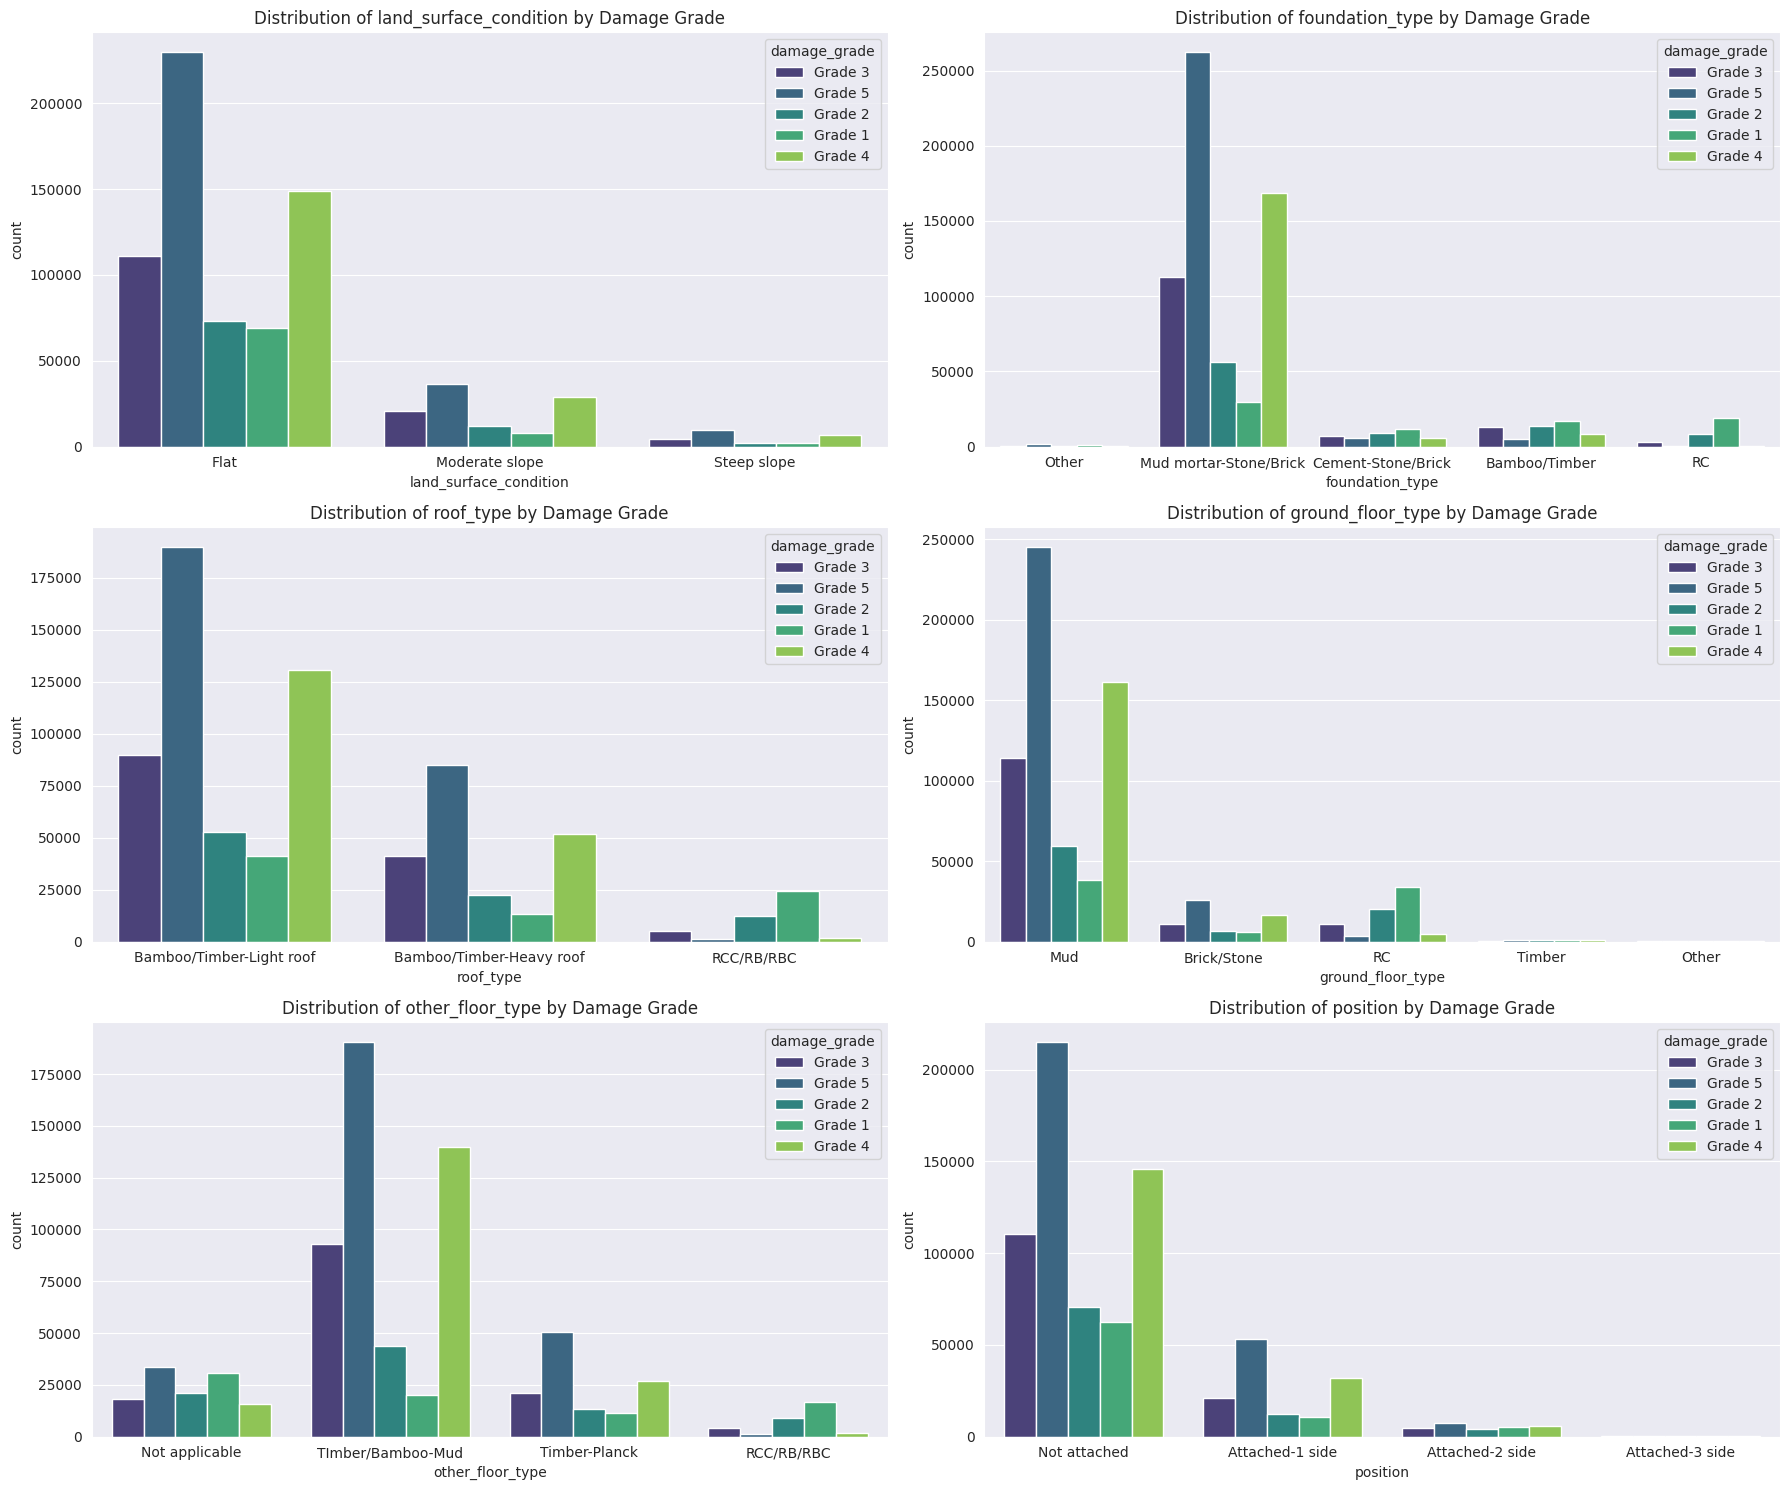

In [ ]:
cat_col=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position']
def catplot(cat_col):
  fig=plt.figure(figsize=(18,15))
  for i,txt in enumerate(cat_col):
    ax=fig.add_subplot(3,2,i+1)
    sns.countplot(x=txt,ax=ax,hue='damage_grade',data=df,palette='viridis')
    ax.set_title(f'Distribution of {txt} by Damage Grade')
  plt.tight_layout()
  plt.show()
catplot(cat_col)

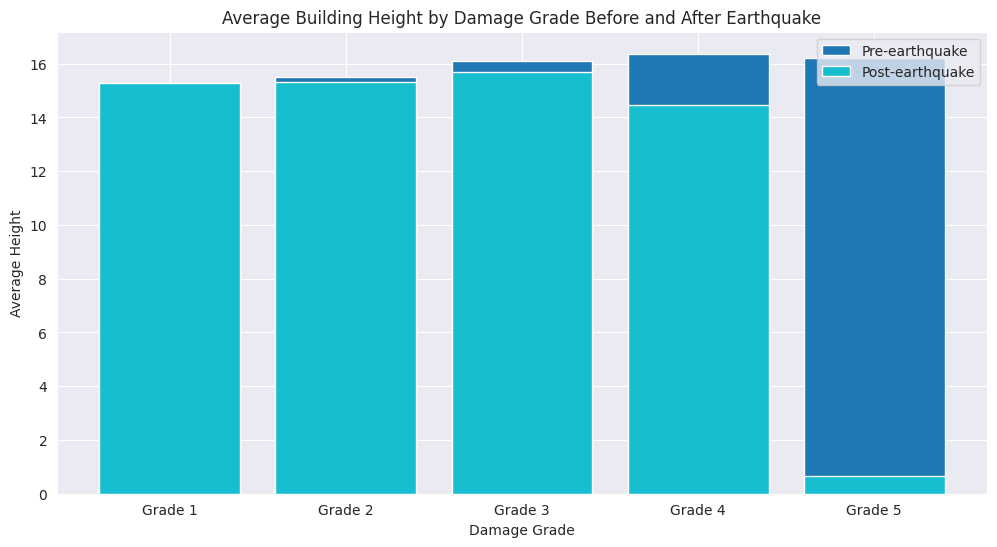

In [ ]:
# Average Building Height by Damage Grade Before and After Earthquake
sns.set_style('darkgrid')
grouped_data = df.groupby('damage_grade')[['height_ft_pre_eq', 'height_ft_post_eq']].mean()
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(grouped_data.index, grouped_data['height_ft_pre_eq'], label='Pre-earthquake', color='tab:blue')
ax.bar(grouped_data.index, grouped_data['height_ft_post_eq'], label='Post-earthquake', color='tab:cyan')
ax.set_xlabel('Damage Grade')
ax.set_ylabel('Average Height')
ax.set_title('Average Building Height by Damage Grade Before and After Earthquake')
ax.legend()
plt.show()

**Average building height by damage grade:**
   - Pre-earthquake average height is generally higher for Grade 5 buildings compared to other grades.
   - Post-earthquake average height shows a decrease across all grades, indicating significant structural damage.

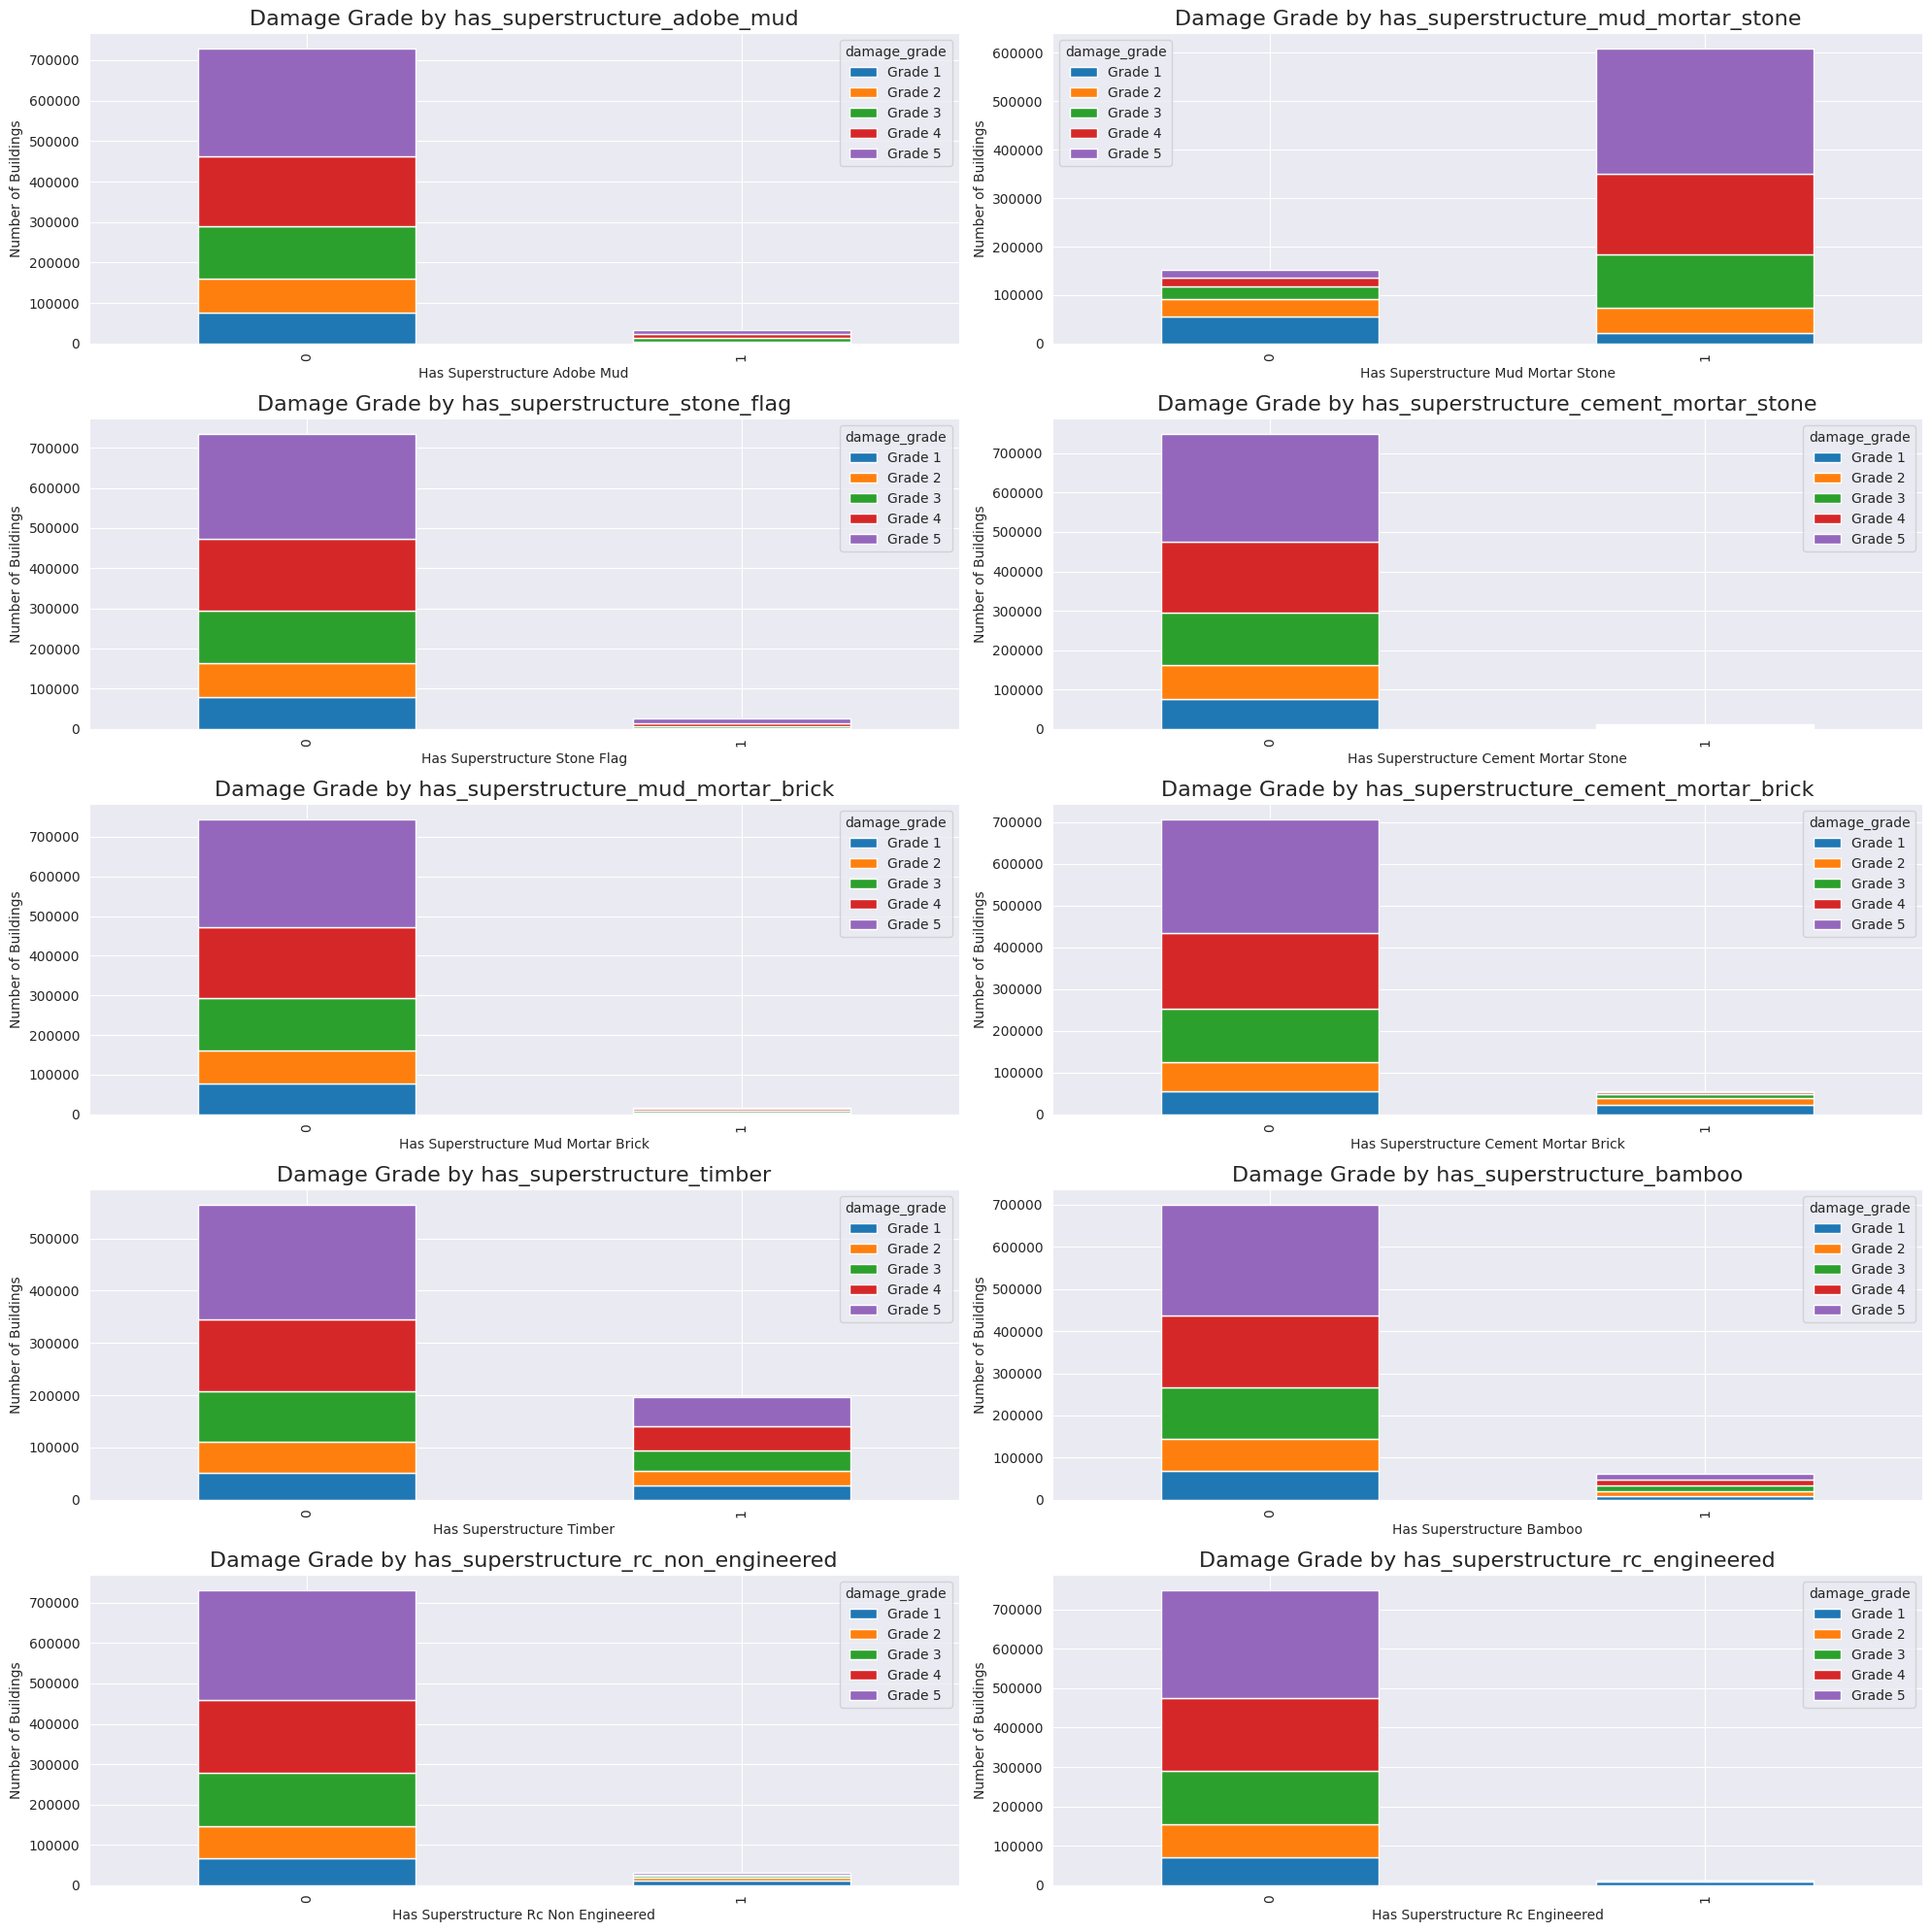

In [ ]:
columns = [
    'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag',
    'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick',
    'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber',
    'has_superstructure_bamboo',
    'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten to easily iterate over axes

# Iterate over columns and create bar plots
for i, col in enumerate(columns):
    grouped_data = df.groupby(col)['damage_grade'].value_counts().unstack()
    grouped_data.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'Damage Grade by {col}', fontsize=16)
    axes[i].set_xlabel(f'{col.replace("_", " ").title()}')
    axes[i].set_ylabel('Number of Buildings')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

 **"Damage Grade by Superstructure Type":**

- Each bar in the plot represents the count of buildings with a specific damage grade for a given superstructure type.
- The plot shows that buildings with superstructure made of Adobe/Mud (has_superstructure_adobe_mud) have a higher proportion of Grade 5 damage compared to other superstructure types.
- Superstructures made of Mud Mortar Stone (has_superstructure_mud_mortar_stone) and Stone Flags (has_superstructure_stone_flag) also show a significant number of Grade 5 buildings.
- Engineered Reinforced Concrete (has_superstructure_rc_engineered) structures have a relatively lower proportion of Grade 5 damage, suggesting their better performance during the earthquake.
- Superstructures made of Timber (has_superstructure_timber) and Bamboo (has_superstructure_bamboo) show a higher frequency of lower damage grades (Grade 1 and Grade 2).
- The plot highlights the influence of superstructure materials on the extent of damage sustained during the earthquake.



 The plots highlight the impact of the earthquake on buildings in the region. The distribution of damage grades and structural characteristics provides valuable insights for understanding the vulnerability of buildings and the need for effective earthquake-resistant construction practices.


In [ ]:
# Simplifying Damage Grades
label_mapping={'Grade 1':'Grade 1','Grade 2':'Grade 1','Grade 3':'Grade 2','Grade 4':'Grade 2','Grade 5':'Grade 3'}

In [ ]:
df['damage_grade']=df['damage_grade'].map(label_mapping)



# **LABEL ENCODING**

---

Converting categorical labels into numerical format.

In [ ]:
df_label=df.copy()

In [ ]:
cat_columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration',
         'condition_post_eq','damage_grade']
le_dict1={}
for col in cat_columns:
  le_dict1[col]=LabelEncoder()
  df_label[col]=le_dict1[col].fit_transform(df_label[col])

In [ ]:
df_label

,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade
0,1,1,9,288,9,9,0,3,1,1,...,0,0,0,0,1,0,0,0,6,1
1,1,1,15,364,9,9,0,3,1,1,...,0,0,0,0,1,0,0,0,2,2
2,1,1,20,384,9,9,0,3,1,1,...,0,0,0,0,0,0,0,0,2,0
3,1,1,20,312,9,9,0,3,1,1,...,0,0,0,0,0,0,0,0,2,0
4,1,1,30,308,9,9,0,3,1,1,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,2,0,60,165,18,0,0,2,0,1,...,0,0,0,0,0,0,0,0,4,2
762102,2,0,35,342,18,0,0,2,0,1,...,0,0,0,0,0,0,0,0,4,2
762103,2,0,35,342,18,0,0,2,0,1,...,0,0,0,0,0,0,0,0,4,2
762104,2,0,19,306,18,0,0,2,0,1,...,0,0,0,0,0,0,0,0,4,2


## **FEATURE SELECTION**

## **Chi-Square Test**

---

The chi-square test is a statistical method used in feature selection to determine the independence between categorical variables.The main goal of using the chi-square test in feature selection is to identify the features (independent variables) that have the strongest relationship with the target variable (dependent variable).


In [ ]:
cat_col=df_label[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration',
         'condition_post_eq']]
target= df_label["damage_grade"]
# apply SelectKBest class to extract  best features
bestfeatures=SelectKBest(score_func=chi2,k=8)
fit=bestfeatures.fit(cat_col,target)

dfscore=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(cat_col.columns)

featureScores=pd.concat([dfcolumns,dfscore],axis=1)
featureScores.columns=['features','score']
featureScores

# print features with their score
bestfea=featureScores.nlargest(9,'score')
bestfea

,features,score
7,condition_post_eq,185582.380015
3,ground_floor_type,44847.365296
4,other_floor_type,22333.099268
2,roof_type,14236.222193
0,land_surface_condition,1528.887202
1,foundation_type,864.253931
5,position,465.339699
6,plan_configuration,113.652763


In [ ]:
# Dropping the features with lowest score
df.drop(columns=['position','plan_configuration'],inplace=True)

In [ ]:
warnings.filterwarnings('ignore')

## **Heatmap**

---
 Graphical representation that visually displays the correlation matrix of features in a dataset. It is used to identify highly correlated features, which can then be considered for removal or further analysis during the feature selection process.



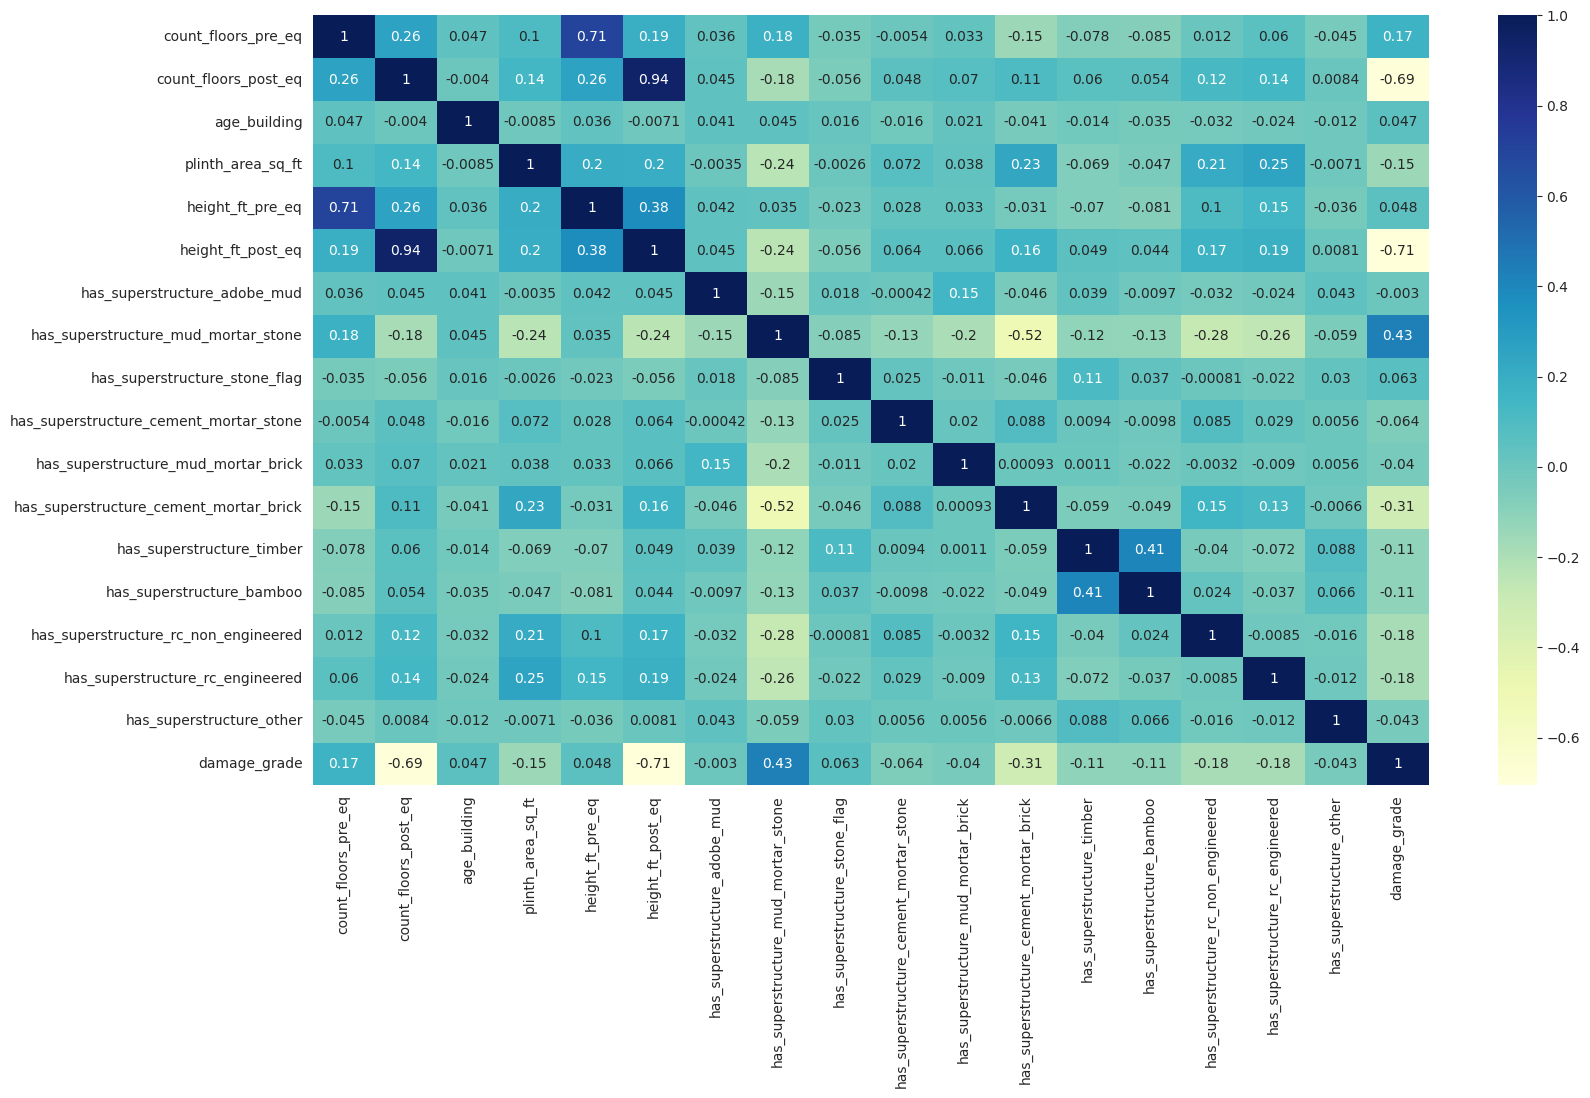

In [ ]:
numerical_cols= df_label[['count_floors_pre_eq','count_floors_post_eq','age_building','plinth_area_sq_ft','height_ft_pre_eq','height_ft_post_eq',
                     'has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag','has_superstructure_cement_mortar_stone',
                     'has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick', 'has_superstructure_timber','has_superstructure_bamboo',
                     'has_superstructure_rc_non_engineered','has_superstructure_rc_engineered', 'has_superstructure_other']]
target = df_label["damage_grade"]


# Add target to the dataframe
numerical_cols['damage_grade'] = target

# Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

# Plot the heatmap
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()


In [ ]:
# Get absolute correlation values with the target
corr_with_target = corr_matrix['damage_grade'].abs().sort_values(ascending=False)
corr_with_target

damage_grade                              1.000000
height_ft_post_eq                         0.705829
count_floors_post_eq                      0.694849
has_superstructure_mud_mortar_stone       0.429467
has_superstructure_cement_mortar_brick    0.314929
has_superstructure_rc_non_engineered      0.184407
has_superstructure_rc_engineered          0.179820
count_floors_pre_eq                       0.165996
plinth_area_sq_ft                         0.149733
has_superstructure_bamboo                 0.108814
has_superstructure_timber                 0.107862
has_superstructure_cement_mortar_stone    0.063663
has_superstructure_stone_flag             0.063181
height_ft_pre_eq                          0.047543
age_building                              0.047401
has_superstructure_other                  0.042685
has_superstructure_mud_mortar_brick       0.039623
has_superstructure_adobe_mud              0.003015
Name: damage_grade, dtype: float64

## **Multicollinearity**

---
Multicollinearity refers to the condition in which two or more predictors are highly correlated with one another. When features are highly correlated, it becomes challenging to determine the individual effect of each feature on the target variable. Multicollinearity can cause overfitting

 * Due to a high correlation coefficient of 0.94 between count_floors_post_eq and height_ft_post_eq and high correlation coefficient of 0.71 between count_floors_pre_eq and height_ft_pre_eq dropping one of the features **'count_floors_pre_eq'** and **'count_floors_post_eq'**


In [ ]:
df.drop(columns=['count_floors_post_eq','count_floors_pre_eq'],inplace=True)

# **OUTLIER DETECTION AND REMOVAL**

---



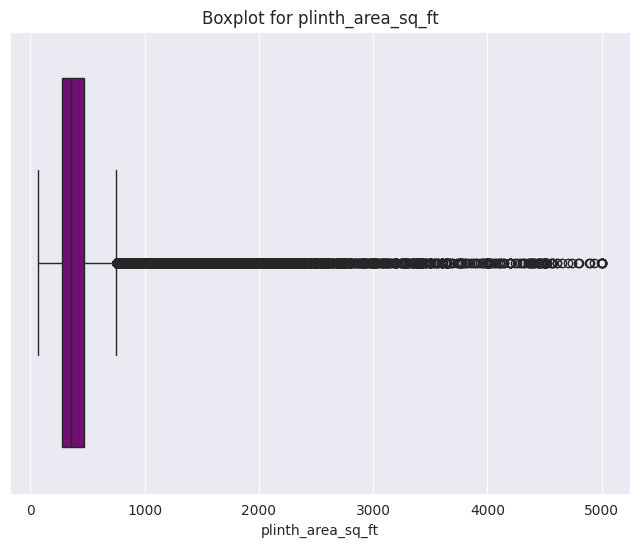

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.title('Boxplot for plinth_area_sq_ft')
sns.boxplot(x='plinth_area_sq_ft',data=df,orient='h',color='purple')
plt.show()

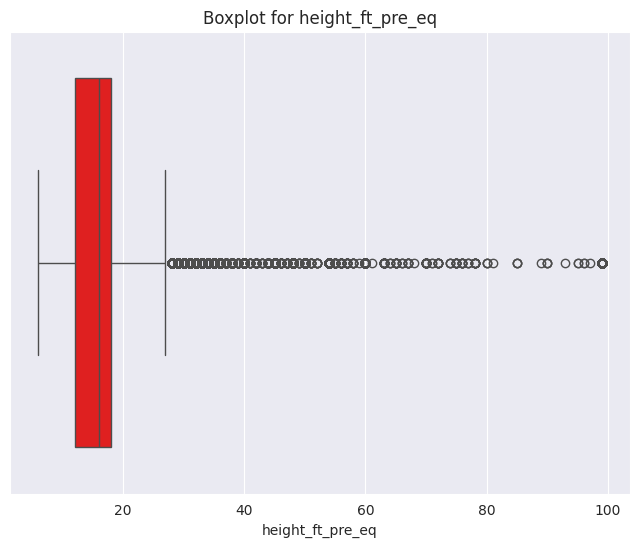

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.title('Boxplot for height_ft_pre_eq')
sns.boxplot(x='height_ft_pre_eq',data=df,orient='h',color='Red')
plt.show()

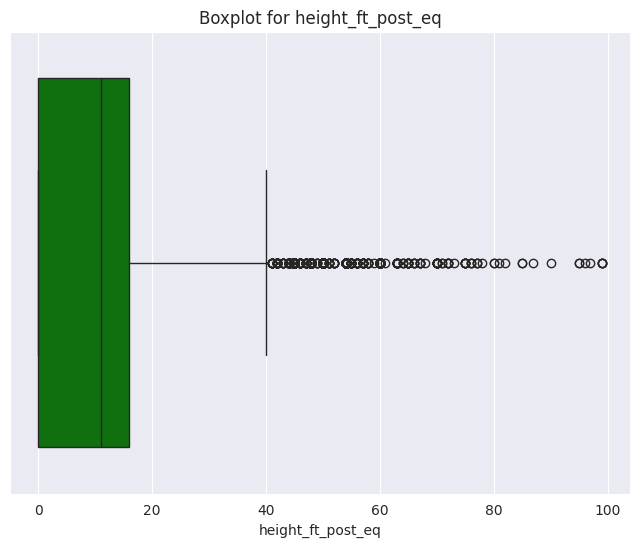

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.title('Boxplot for height_ft_post_eq')
sns.boxplot(x='height_ft_post_eq',data=df,orient='h',color='green')
plt.show()

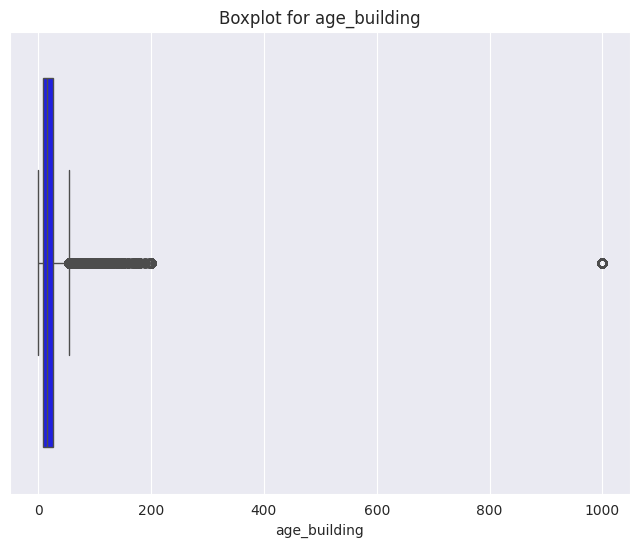

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Boxplot for age_building')
sns.boxplot(x='age_building',data=df,orient='h',color='blue')
plt.show()

In [ ]:
lst=['plinth_area_sq_ft','height_ft_post_eq','height_ft_pre_eq','age_building']
for i in lst:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df= df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [ ]:
df.shape

(670307, 22)

In [ ]:
df['damage_grade'].value_counts()

damage_grade
Grade 2    284481
Grade 3    248869
Grade 1    136957
Name: count, dtype: int64

# **STRATIFIED RANDOM SAMPLING**

---



Stratified random sampling is a method used to select a sample from a population where the population is divided into subgroups, or strata, based on certain characteristics (e.g., categories of a categorical variable). This ensures that the sampled subset maintains the same proportion of each category as in the original dataset.

In [ ]:
# Define the number of samples needed from each category
desired_samples_per_category = 30000
# Create a new DataFrame to store the sampled data
df1=pd.DataFrame()
# Group by the target variable and sample from each group
for category, group in df.groupby('damage_grade'):
    sampled_group = group.sample(n=desired_samples_per_category, random_state=42)
    df1 = pd.concat([df1, sampled_group])
df1.reset_index(drop=True, inplace=True)
# distribution of the target variable in the sampled data
print(df1['damage_grade'].value_counts())

damage_grade
Grade 1    30000
Grade 2    30000
Grade 3    30000
Name: count, dtype: int64


In [ ]:
# Label encoding categorical labels in the new sampled data
categorical_columns=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','condition_post_eq','damage_grade']
le_dict={}
for col in categorical_columns:
  le_dict[col]=LabelEncoder()
  df1[col]=le_dict[col].fit_transform(df1[col])

In [ ]:
df1.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,has_superstructure_adobe_mud,...,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade
0,5,304,16,16,0,2,0,1,3,0,...,0,0,0,1,0,0,0,0,6,0
1,53,432,17,17,0,2,1,1,2,0,...,0,0,0,0,0,0,0,0,1,0
2,12,286,14,14,0,2,1,1,2,0,...,0,0,0,0,0,0,0,0,6,0
3,1,216,7,7,0,2,1,1,0,0,...,0,0,0,0,0,0,0,0,7,0
4,21,683,12,12,0,2,1,1,3,0,...,0,0,0,0,0,0,0,0,6,0


# **SEPERATING FEATURES AND TARGET**

---

In [ ]:
x=df1.drop('damage_grade',axis=1)
y=df1['damage_grade']

# **TRAIN TEST SPLIT**

---



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(f'training data shape {(x_train.shape,y_train.shape)}')
print(f'testing data shape {(x_test.shape,y_test.shape)}')

training data shape ((72000, 21), (72000,))
testing data shape ((18000, 21), (18000,))


# **NORMALIZATION**

---
Normalization refers to the process of rescaling the features to a range of [0, 1]

**STANDARDSCALER**

* Standard Scaler transforms the data to have a mean of 0 and a standard deviation of 1



In [ ]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

## **MODEL CREATION**

Using algorithms

---





*   K Nearest Neighbors
*   Support Vector Machine
*   Naive Bayes
*   Decision Tree
*   Random Forest
*   GradientBoosting
*   XGBoost

In [ ]:
knn=KNeighborsClassifier()
svm=SVC()
naive=GaussianNB()
decision=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [ ]:
models={
    'KNN':knn,
    'SVM':svm,
    'NAIVE BAYES':naive,
    'DECISION TREE CLASSIFIER':decision,
    'RANDOM FOREST CLASSIFIER':rf,
    'GRADIENT BOOSTING CLASSIFIER':gb,
    'XGBCLASSIFIER':xgb}

# **MODEL EVALUATION**


---



In [ ]:
def model_evaluation(model):
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  print(model)
  print('Accuracy_Score:','\n',accuracy_score(y_test,y_pred)*100)
  print(classification_report(y_test,y_pred))
  print('_'*100,'\n')

In [ ]:
for model in models.values():
  model_evaluation(model)

KNeighborsClassifier()
Accuracy_Score: 
 80.52222222222221
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      5942
           1       0.71      0.74      0.73      6060
           2       0.99      0.93      0.96      5998

    accuracy                           0.81     18000
   macro avg       0.81      0.81      0.81     18000
weighted avg       0.81      0.81      0.81     18000

____________________________________________________________________________________________________ 

SVC()
Accuracy_Score: 
 80.83888888888889
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      5942
           1       0.69      0.79      0.74      6060
           2       1.00      0.94      0.97      5998

    accuracy                           0.81     18000
   macro avg       0.82      0.81      0.81     18000
weighted avg       0.82      0.81      0.81     18000

__________________________________

Fitting the best model **XGBCLASSIFIER**

In [ ]:
xgb.fit(x_train_scaled,y_train)
y_pred1=xgb.predict(x_test_scaled)
print(xgb)
print('Accuracy_Score:','\n',accuracy_score(y_test,y_pred1)*100)
print(classification_report(y_test,y_pred1))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy_Score: 
 84.83888888888889
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      5942
           1       0.75      0.84      0.79      6060
           2       1.00      0.95 

In [ ]:
# Training accuracy
xgb.score(x_train_scaled,y_train)

0.8688611111111111

# **CONFUSION MATRIX**

---
A confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted classifications against the actual outcomes, providing a comprehensive view of how well the model is performing in terms of correctly and incorrectly classified instances.


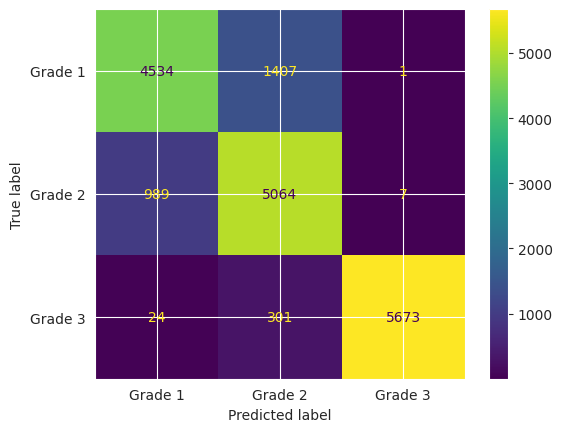

In [ ]:
cm=confusion_matrix(y_test,y_pred1)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Grade 1','Grade 2','Grade 3'])
disp.plot()
plt.show()

In this project, we successfully analyzed a dataset related to building damage assessment after an earthquake. We employed various techniques such as data cleaning, feature engineering, outlier detection and removal, and stratified random sampling to prepare the data for modeling. We then trained and evaluated several machine learning models, including KNN, SVM, Naive Bayes, Decision Tree, Random Forest, Gradient Boosting, and XGBoost.

#**XGBoost classifier emerged as the best performing model, achieving an accuracy score of 85% on the test data.**

 This model can be utilized to predict the damage grade of buildings based on various structural characteristics and earthquake impact factors.



# **MODEL DEPLOYMENT**

---



In [ ]:
def prediction_value(age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,
       other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,
       has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,
       has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq):
  land_surface_condition=le_dict['land_surface_condition'].transform([land_surface_condition])[0]
  foundation_type=le_dict['foundation_type'].transform([foundation_type])[0]
  roof_type=le_dict['roof_type'].transform([roof_type])[0]
  ground_floor_type=le_dict['ground_floor_type'].transform([ground_floor_type])[0]
  other_floor_type=le_dict['other_floor_type'].transform([other_floor_type])[0]
  condition_post_eq=le_dict['condition_post_eq'].transform([condition_post_eq])[0]
  input_data = [[age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,
       other_floor_type,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,
       has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,
       has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq]]
  input_data_scaled = ss.transform(input_data)
  prediction = xgb.predict(input_data_scaled)[0]
  return prediction

In [ ]:
prediction_value(10,150,11,11,'Flat','Bamboo/Timber','Bamboo/Timber-Heavy roof','Mud','Not applicable',0,0,0,0,0,0,1,1,0,0,0,'Damaged-Used in risk')

1

In [ ]:
le_dict['damage_grade'].inverse_transform([1])[0]

'Grade 2'

In [ ]:
prediction_value(7,434,10,0,'Flat','Mud mortar-Stone/Brick','Bamboo/Timber-Light roof','Mud','Not applicable',0,1,0,0,0,0,0,0,0,0,0,'Damaged-Rubble Clear-New building built')

2

In [ ]:
le_dict['damage_grade'].inverse_transform([2])[0]

'Grade 3'

In [ ]:
prediction_value(5,304,16,16,'Flat','Mud mortar-Stone/Brick','Bamboo/Timber-Heavy roof','Mud','Timber-Planck',0,1,0,0,0,0,1,0,0,0,0,'Damaged-Used in risk')

0

In [ ]:
le_dict['damage_grade'].inverse_transform([0])[0]

'Grade 1'

In [ ]:
needed1_files={'label_encoder':le_dict,'model':xgb,'scaler':ss}
project_file=open('eqproject.pkl','wb')
pickle.dump(needed1_files,project_file)

In [ ]:
le_dict

{'land_surface_condition': LabelEncoder(),
 'foundation_type': LabelEncoder(),
 'roof_type': LabelEncoder(),
 'ground_floor_type': LabelEncoder(),
 'other_floor_type': LabelEncoder(),
 'condition_post_eq': LabelEncoder(),
 'damage_grade': LabelEncoder()}

In [ ]:
!pip install --upgrade imbalanced-learn scikit-learn

In [ ]:
!pip install --upgrade pandas

In [ ]:
!jupyter nbconvert --to html "/content/Predicting_Building_Damage_Severity_from_Earthquakes (1).ipynb"

[NbConvertApp] Converting notebook /content/Predicting_Building_Damage_Severity_from_Earthquakes (1).ipynb to html
[NbConvertApp] Writing 2440994 bytes to /content/Predicting_Building_Damage_Severity_from_Earthquakes (1).html
